In [1]:
import os

import pandas as pd

from tqdm import tqdm
from IPython.display import Image

In [2]:
lines = {}

In [3]:
with open('data/IAM/ascii/lines.txt', 'r') as f:
    for i in f.readlines():
        if(not i.startswith("#")):
            lines[i.split()[8].replace("|", " ")] = i.split()[0]
f.close()

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories names in the given directory 
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles

In [5]:
alllines = getListOfFiles('data/IAM/lines/')

In [6]:
for key, value in tqdm(lines.items(), total = len(lines)):
    for file in alllines:
        if file.endswith(value + '.png'):
            lines[key] = file

100%|██████████| 12760/12760 [00:28<00:00, 454.75it/s]


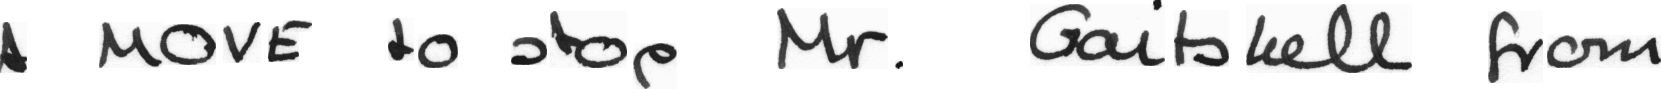

In [7]:
Image(lines['A MOVE to stop Mr. Gaitskell from'])

In [8]:
sentences = {}

In [9]:
with open('data/IAM/ascii/sentences.txt', 'r') as f:
    for i in f.readlines():
        if(not i.startswith("#")):
            sentences[i.split()[9].replace("|", " ")] = i.split()[0]
f.close()

In [10]:
allsentences = getListOfFiles('data/IAM/sentences/')

In [11]:
for key, value in tqdm(sentences.items(), total = len(sentences)):
    for file in allsentences:
        if file.endswith(value + '.png'):
            sentences[key] = file

100%|██████████| 15577/15577 [00:41<00:00, 373.49it/s]


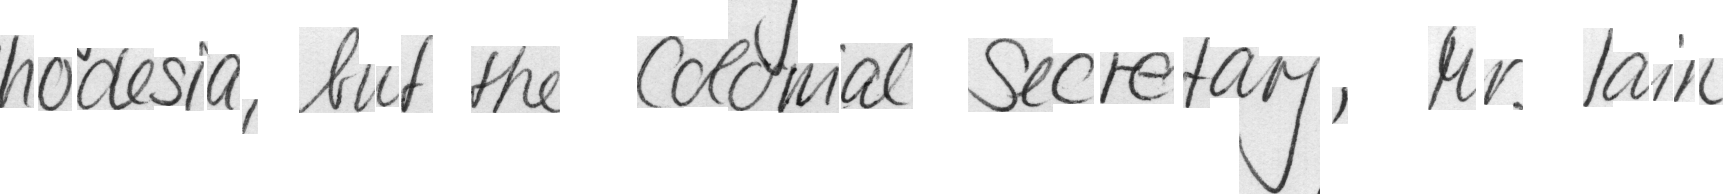

In [12]:
Image(sentences['Rhodesia , but the Colonial Secretary , Mr. Iain'])

In [13]:
htr_data = lines
htr_data.update(sentences)
del lines
del sentences

In [14]:
bentham = {}
bentham_text = "data/Bentham/Transcriptions/"
bentham_images = "data/Bentham/Images/Lines/"

In [15]:
for i in tqdm(os.listdir(bentham_text)):
    with open(bentham_text + i, 'r') as f:
        bentham[" ".join([line for line in f.readlines()]).rstrip()] = bentham_images + i.split(".")[0] + ".png"

100%|██████████| 11473/11473 [00:00<00:00, 37294.22it/s]


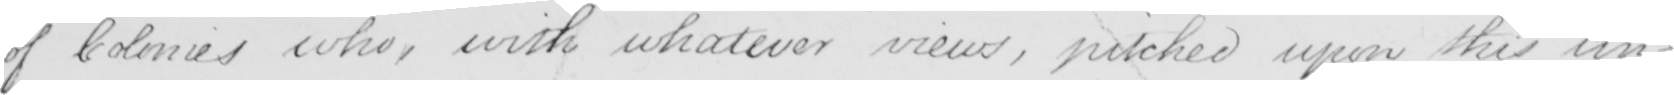

In [16]:
Image(bentham['of Colonies who , with whatever views , pitched upon this un-'])

In [17]:
htr_data.update(bentham)
del bentham

In [18]:
# Location Check
for value in htr_data.values():
    if not os.path.exists(value):
        print(value + " does not exist")

In [19]:
htr = {"Text": [], "Image Location": []}
for key,value in htr_data.items():
    htr["Text"].append(key)
    htr["Image Location"].append(value)
del htr_data

In [20]:
htr_data = pd.DataFrame.from_dict(htr)

In [21]:
htr_data.to_csv("handwrittentext.csv", index = False)